# I. Load Libraries

In [1]:
import requests as req #Used for webscraping; get URL
from bs4 import BeautifulSoup as bs #Convert to BeautifulSoup object
import tabula #Import tabula to read tables from PDF's
import pandas as pd #Convert to pandas DF
import os.path #check if file exists for a desired folder/path

# II. Webscraping FWC Using `BeautifulSoup`

In [2]:
res = req.get('https://myfwc.com/research/manatee/rescue-mortality-response/statistics/mortality/yearly/') #GET request for url

b'\n\n<!DOCTYPE html>\n<html lang="en">\n<head prefix="og: http://ogp.me/ns#">\n    \n    <link rel="preconnect" href="https://fonts.gstatic.com">\n\n    <meta charset="UTF-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n    <meta property="og:type" content="website" />\n    <meta property="og:site_name" content="Florida Fish And Wildlife Conservation Commission" />\n    <meta property="og:url" content="http://myfwc.com/research/manatee/rescue-mortality-response/statistics/mortality/yearly/" />\n        <meta property="og:title" content="Yearly Mortality Summaries" />\n        <meta property="og:description" content="Yearly" />\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n    \n\n        <title>Yearly Mortality Summaries | FWC</title>\n\n    <link rel="shortcut icon" href="/favicon.ico" />\n    \n\n\n        <link rel="canonical" href="https://myfwc.com/research/manatee/rescue-mortality-response/statistics/mor
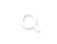
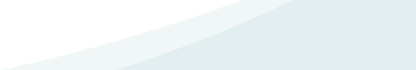

In [3]:
res.content #response’s (req.get()) content in bytes

In [4]:
soup = bs(res.content, 'lxml') #Convert to Beautiful Soup object

<!DOCTYPE html>
<html lang="en">
<head prefix="og: http://ogp.me/ns#">
<link href="https://fonts.gstatic.com" rel="preconnect"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="website" property="og:type"/>
<meta content="Florida Fish And Wildlife Conservation Commission" property="og:site_name"/>
<meta content="http://myfwc.com/research/manatee/rescue-mortality-response/statistics/mortality/yearly/" property="og:url"/>
<meta content="Yearly Mortality Summaries" property="og:title"/>
<meta content="Yearly" property="og:description"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Yearly Mortality Summaries | FWC</title>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="https://myfwc.com/research/manatee/rescue-mortality-response/statistics/mortality/yearly/" rel="canonical"/>
<script>
            var date = new Date();
            date.setTime(date.getTime() + (86400000));
 
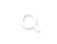
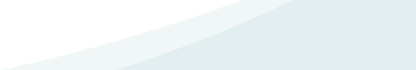

In [5]:
soup #view content

In [6]:
summary_files = soup.find_all('div', {'class': 'stacked single-list brown'}) #find class from inspecting website

In [7]:
type(summary_files[0]) #view the "type" of object

bs4.element.Tag

In [8]:
len(summary_files) #number of items in class 

1

In [9]:
summary_files[0] #print item

<div class="stacked single-list brown">
<div class="stacked-wrap">
<div class="container">
<h2>Yearly Summary Files</h2>
<ul class="stacked-multi-list single">
<li><a href="/media/11661/1974yearsummary.pdf" target="_blank">1974</a></li>
<li><a href="/media/11660/1975yearsummary.pdf" target="_blank">1975</a></li>
<li><a href="/media/11659/1976yearsummary.pdf" target="_blank">1976</a></li>
<li><a href="/media/11658/1977yearsummary.pdf" target="_blank">1977</a></li>
<li><a href="/media/11657/1978yearsummary.pdf" target="_blank">1978</a></li>
<li><a href="/media/11656/1979yearsummary.pdf" target="_blank">1979</a></li>
<li><a href="/media/11655/1980yearsummary.pdf" target="_blank">1980</a></li>
<li><a href="/media/11654/1981yearsummary.pdf" target="_blank">1981</a></li>
<li><a href="/media/11653/1982yearsummary.pdf" target="_blank">1982</a></li>
<li><a href="/media/11652/1983yearsummary.pdf" target="_blank">1983</a></li>
<li><a href="/media/11651/1984yearsummary.pdf" target="_blank">1984</a

In [10]:
summary_files[0].find('ul', {'class': "stacked-multi-list single"}) #navigate to pdf weblinks

<ul class="stacked-multi-list single">
<li><a href="/media/11661/1974yearsummary.pdf" target="_blank">1974</a></li>
<li><a href="/media/11660/1975yearsummary.pdf" target="_blank">1975</a></li>
<li><a href="/media/11659/1976yearsummary.pdf" target="_blank">1976</a></li>
<li><a href="/media/11658/1977yearsummary.pdf" target="_blank">1977</a></li>
<li><a href="/media/11657/1978yearsummary.pdf" target="_blank">1978</a></li>
<li><a href="/media/11656/1979yearsummary.pdf" target="_blank">1979</a></li>
<li><a href="/media/11655/1980yearsummary.pdf" target="_blank">1980</a></li>
<li><a href="/media/11654/1981yearsummary.pdf" target="_blank">1981</a></li>
<li><a href="/media/11653/1982yearsummary.pdf" target="_blank">1982</a></li>
<li><a href="/media/11652/1983yearsummary.pdf" target="_blank">1983</a></li>
<li><a href="/media/11651/1984yearsummary.pdf" target="_blank">1984</a></li>
<li><a href="/media/11650/1985yearsummary.pdf" target="_blank">1985</a></li>
<li><a href="/media/11649/1986yearsum

In [11]:
summary_files[0].find('ul', {'class': "stacked-multi-list single"}).text #view "text" of all links

'\n1974\n1975\n1976\n1977\n1978\n1979\n1980\n1981\n1982\n1983\n1984\n1985\n1986\n1987\n1988\n1989\n1990\n1991\n1992\n1993\n1994\n1995\n1996\n1997\n1998\n1999\n2000\n2001\n2002\n2003\n2004\n2005\n2006\n2007\n2008\n2009\n2010\n2011\n2012\n2013\n2014\n2015\n2016\n2017\n2018\n2019\n'

In [12]:
summary_files[0].find('a') #find a link from webpage list of links

<a href="/media/11661/1974yearsummary.pdf" target="_blank">1974</a>

In [13]:
summary_files[0].find('a').text #convert links to text, gives year

'1974'

In [14]:
summary_files[0].find('a').get('href') #get href

'/media/11661/1974yearsummary.pdf'

In [15]:
#loop through summary_files and get all href's and add full link to list

links = []
base_url = "https://myfwc.com/" #base url of all links

for x in summary_files[0].find_all("a"):
    href = x.get("href")
    full_link = base_url + href 
    links.append(full_link)

links[0] #print first link 

'https://myfwc.com//media/11661/1974yearsummary.pdf'

# III. Using `Tabula`

In [16]:
pdf_path = links[0] #specify path to pdf

In [17]:
df = tabula.read_pdf(pdf_path, pages='all') #read pdf into list of dataframe
len(df)

1

In [18]:
df[0] #read first item in dataframe list

County  Watercraft       Flood  Other  Perinatal    Cold  Natural  \
0           NaN         NaN  Gate/Canal  Human        NaN  Stress      NaN   
1           NaN         NaN        Lock    NaN        NaN     NaN      NaN   
2       Brevard         0.0           0      1        0.0       0      0.0   
3       Broward         0.0           0      0        0.0       0      0.0   
4        Citrus         1.0           0      0        0.0       0      0.0   
5  Indian River         0.0           0      0        0.0       0      0.0   
6    Miami-Dade         2.0           0      0        0.0       0      0.0   
7       Volusia         0.0           0      1        0.0       0      0.0   
8        TOTAL:         3.0           0      2        0.0       0      0.0   

   Undetermined  Unrecovered  Total  
0           NaN          NaN    NaN  
1           NaN          NaN    NaN  
2           0.0          0.0    1.0  
3           1.0          0.0    1.0  
4           0.0          0.0    1.0  
5           1.0          0.0    1.0  
6           0.0          0.0    2.0  
7           0.0          0.0    1.0  
8           2.0          0.0    7.0

In [19]:
tabula.convert_into(pdf_path, "test.csv", output_format="csv", pages='all') #convert PDFs into CSV file
    #output path "C:\Users\07hoc"

In [20]:
panda_df = pd.DataFrame(df[0]) #convert to pandas df
panda_df.head(10)
# Remove Row 0, 1

County  Watercraft       Flood  Other  Perinatal    Cold  Natural  \
0           NaN         NaN  Gate/Canal  Human        NaN  Stress      NaN   
1           NaN         NaN        Lock    NaN        NaN     NaN      NaN   
2       Brevard         0.0           0      1        0.0       0      0.0   
3       Broward         0.0           0      0        0.0       0      0.0   
4        Citrus         1.0           0      0        0.0       0      0.0   
5  Indian River         0.0           0      0        0.0       0      0.0   
6    Miami-Dade         2.0           0      0        0.0       0      0.0   
7       Volusia         0.0           0      1        0.0       0      0.0   
8        TOTAL:         3.0           0      2        0.0       0      0.0   

   Undetermined  Unrecovered  Total  
0           NaN          NaN    NaN  
1           NaN          NaN    NaN  
2           0.0          0.0    1.0  
3           1.0          0.0    1.0  
4           0.0          0.0    1.0  
5           1.0          0.0    1.0  
6           0.0          0.0    2.0  
7           0.0          0.0    1.0  
8           2.0          0.0    7.0

In [21]:
test_df = panda_df.dropna(axis='rows').reset_index(drop=True) #drop NaN rows
test_df.shape

(7, 10)

In [22]:
test_df.head(10)

County  Watercraft Flood Other  Perinatal Cold  Natural  \
0       Brevard         0.0     0     1        0.0    0      0.0   
1       Broward         0.0     0     0        0.0    0      0.0   
2        Citrus         1.0     0     0        0.0    0      0.0   
3  Indian River         0.0     0     0        0.0    0      0.0   
4    Miami-Dade         2.0     0     0        0.0    0      0.0   
5       Volusia         0.0     0     1        0.0    0      0.0   
6        TOTAL:         3.0     0     2        0.0    0      0.0   

   Undetermined  Unrecovered  Total  
0           0.0          0.0    1.0  
1           1.0          0.0    1.0  
2           0.0          0.0    1.0  
3           1.0          0.0    1.0  
4           0.0          0.0    2.0  
5           0.0          0.0    1.0  
6           2.0          0.0    7.0

In [23]:
# add link for 2020 yearly data to links list (Section II)
links.append("https://myfwc.com/media/22565/yeartodate.pdf")
len(links)

47

In [24]:
#convert data in links collected above to pandas_df
data = []

for link in links:
    df = tabula.read_pdf(link, pages=1)
    panda_df = pd.DataFrame(df[0])
    test_df = panda_df.dropna(axis='rows').reset_index(drop=True)
    data.append(test_df)

In [25]:
len(data)

47

In [26]:
data[0]

County  Watercraft Flood Other  Perinatal Cold  Natural  \
0       Brevard         0.0     0     1        0.0    0      0.0   
1       Broward         0.0     0     0        0.0    0      0.0   
2        Citrus         1.0     0     0        0.0    0      0.0   
3  Indian River         0.0     0     0        0.0    0      0.0   
4    Miami-Dade         2.0     0     0        0.0    0      0.0   
5       Volusia         0.0     0     1        0.0    0      0.0   
6        TOTAL:         3.0     0     2        0.0    0      0.0   

   Undetermined  Unrecovered  Total  
0           0.0          0.0    1.0  
1           1.0          0.0    1.0  
2           0.0          0.0    1.0  
3           1.0          0.0    1.0  
4           0.0          0.0    2.0  
5           0.0          0.0    1.0  
6           2.0          0.0    7.0

In [27]:
df = pd.concat(data) #count unique counties
sorted(dict(df["County"].value_counts()).items())

[('Bay', 13),
 ('Brevard', 47),
 ('Broward', 47),
 ('Charlotte', 43),
 ('Citrus', 46),
 ('Clay', 37),
 ('Collier', 45),
 ('DeSoto', 13),
 ('Dixie', 20),
 ('Duval', 45),
 ('Escambia', 4),
 ('Flagler', 34),
 ('Franklin', 16),
 ('Gilchrist', 6),
 ('Glades', 43),
 ('Gulf', 7),
 ('Hendry', 17),
 ('Hernando', 18),
 ('Highlands', 1),
 ('Hillsborough', 44),
 ('Indian River', 41),
 ('Jefferson', 1),
 ('Lake', 26),
 ('Lee', 46),
 ('Levy', 36),
 ('Manatee', 41),
 ('Marion', 8),
 ('Martin', 46),
 ('Miami-Dade', 47),
 ('Monroe', 43),
 ('Nassau', 22),
 ('Okaloosa', 6),
 ('Okeechobee', 27),
 ('Orange', 1),
 ('Palm Beach', 44),
 ('Pasco', 27),
 ('Pinellas', 40),
 ('Putnam', 40),
 ('Santa Rosa', 4),
 ('Sarasota', 42),
 ('Seminole', 15),
 ('St. Johns', 38),
 ('St. Lucie', 41),
 ('TOTAL:', 47),
 ('Taylor', 16),
 ('Volusia', 47),
 ('Wakulla', 15),
 ('Walton', 7)]

In [28]:
df["County"].nunique()

48

# IV. Create Full Dataset

In [29]:
# Add corresponding year to each "County" 
year = 1974

for d in data:
    d['County'] = d['County'].apply(lambda x: "{}{}".format(x , year)) # or x+ " "
    year = year + 1

In [30]:
data[3].head() #print 1977 dataframe

County  Watercraft Flood Other  Perinatal Cold  Natural  \
0    Brevard1977         3.0     0     0        1.0    0      1.0   
1    Broward1977         0.0     0     1        1.0    0      0.0   
2  Charlotte1977         0.0     0     0        0.0    0      0.0   
3     Citrus1977         0.0     0     1        0.0    0      0.0   
4       Clay1977         1.0     0     0        0.0    0      0.0   

   Undetermined  Unrecovered  Total  
0          23.0          2.0   30.0  
1           2.0          0.0    4.0  
2           2.0          2.0    4.0  
3           3.0          0.0    4.0  
4           1.0          0.0    2.0

In [31]:
data[-1].head() #print 2020 dataframe

County  Watercraft Flood Gate/ Other  Perinatal Cold  Natural  \
0        Bay2020         0.0           0     0        0.0    0      0.0   
1    Brevard2020        14.0           0     9       35.0   17     15.0   
2    Broward2020         2.0           0     0        1.0    1      4.0   
3  Charlotte2020         2.0           0     0        1.0    0      1.0   
4     Citrus2020         3.0           0     0        4.0    1      0.0   

   Undetermined Not  Total  
0           0.0   3    3.0  
1          26.0  57  173.0  
2           5.0   7   20.0  
3           3.0  10   17.0  
4           2.0   5   15.0

In [32]:
full_data = pd.concat(data) #Concatenate all collected dataframes
full_data = full_data.rename(columns={"County": "County/Year","Watercraft":"Watercraft","Flood":"A1",
                          "Other":"Other/Human","Perinatal":"Perinatal","Cold":"Cold Stress","Natural":"Natural",
                          "Undetermined":"B1","Unrecovered":"B2","Total":"Total","Flood Gate/":"A2",
                          "Not":"Not Necropsied"}) #rename columns
full_data

County/Year  Watercraft   A1 Other/Human  Perinatal Cold Stress  \
0        Brevard1974         0.0    0           1        0.0           0   
1        Broward1974         0.0    0           0        0.0           0   
2         Citrus1974         1.0    0           0        0.0           0   
3   Indian River1974         0.0    0           0        0.0           0   
4     Miami-Dade1974         2.0    0           0        0.0           0   
..               ...         ...  ...         ...        ...         ...   
35        Taylor2020         1.0  NaN           0        0.0           0   
36       Volusia2020         4.0  NaN           2        6.0           3   
37       Wakulla2020         0.0  NaN           0        1.0           0   
38        Walton2020         0.0  NaN           0        0.0           0   
39        TOTAL:2020        90.0  NaN          16      114.0          49   

    Natural    B1   B2  Total   A2 Not Necropsied  
0       0.0   0.0  0.0    1.0  NaN            NaN  
1       0.0   1.0  0.0    1.0  NaN            NaN  
2       0.0   0.0  0.0    1.0  NaN            NaN  
3       0.0   1.0  0.0    1.0  NaN            NaN  
4       0.0   0.0  0.0    2.0  NaN            NaN  
..      ...   ...  ...    ...  ...            ...  
35      0.0   1.0  NaN    2.0    0              0  
36      3.0   7.0  NaN   40.0    0             15  
37      0.0   0.0  NaN    2.0    0              1  
38      0.0   0.0  NaN    1.0    0              1  
39     53.0  91.0  NaN  637.0   11            213  

[1360 rows x 12 columns]

In [33]:
full_data.dtypes #view the type of data in each column

County/Year        object
Watercraft        float64
A1                 object
Other/Human        object
Perinatal         float64
Cold Stress        object
Natural           float64
B1                float64
B2                float64
Total             float64
A2                 object
Not Necropsied     object
dtype: object

In [34]:
#Count number of NaN values
full_data.isna().sum()

County/Year          0
Watercraft           0
A1                 790
Other/Human          0
Perinatal            0
Cold Stress          0
Natural              0
B1                   0
B2                  40
Total                0
A2                 570
Not Necropsied    1320
dtype: int64

In [35]:
#impute 0.0 for NaN
full_data = full_data.fillna(float(0.0))

In [36]:
#convert all columns to float 
full_data['A1'] = full_data['A1'].astype(float)
full_data['A2'] = full_data['A2'].astype(float)
full_data['Not Necropsied'] = full_data['Not Necropsied'].astype(float)
full_data['Other/Human'] = full_data['Other/Human'].astype(float)
full_data['Cold Stress'] = full_data['Cold Stress'].astype(float)
full_data.head()

County/Year  Watercraft   A1  Other/Human  Perinatal  Cold Stress  \
0       Brevard1974         0.0  0.0          1.0        0.0          0.0   
1       Broward1974         0.0  0.0          0.0        0.0          0.0   
2        Citrus1974         1.0  0.0          0.0        0.0          0.0   
3  Indian River1974         0.0  0.0          0.0        0.0          0.0   
4    Miami-Dade1974         2.0  0.0          0.0        0.0          0.0   

   Natural   B1   B2  Total   A2  Not Necropsied  
0      0.0  0.0  0.0    1.0  0.0             0.0  
1      0.0  1.0  0.0    1.0  0.0             0.0  
2      0.0  0.0  0.0    1.0  0.0             0.0  
3      0.0  1.0  0.0    1.0  0.0             0.0  
4      0.0  0.0  0.0    2.0  0.0             0.0

In [37]:
# combine A1 with A2 and B1 with B2
full_data["Flood Gate/Canal Lock"] = full_data["A1"] + full_data["A2"]
full_data["Unrecovered/Undetermined"] = full_data["B1"] + full_data["B2"]

#drop combined columns
full_data = full_data.drop(["A1", "A2", "B1", "B2"], axis="columns")

In [38]:
full_data = full_data.reset_index(drop=True)
full_data

County/Year  Watercraft  Other/Human  Perinatal  Cold Stress  \
0          Brevard1974         0.0          1.0        0.0          0.0   
1          Broward1974         0.0          0.0        0.0          0.0   
2           Citrus1974         1.0          0.0        0.0          0.0   
3     Indian River1974         0.0          0.0        0.0          0.0   
4       Miami-Dade1974         2.0          0.0        0.0          0.0   
...                ...         ...          ...        ...          ...   
1355        Taylor2020         1.0          0.0        0.0          0.0   
1356       Volusia2020         4.0          2.0        6.0          3.0   
1357       Wakulla2020         0.0          0.0        1.0          0.0   
1358        Walton2020         0.0          0.0        0.0          0.0   
1359        TOTAL:2020        90.0         16.0      114.0         49.0   

      Natural  Total  Not Necropsied  Flood Gate/Canal Lock  \
0         0.0    1.0             0.0                    0.0   
1         0.0    1.0             0.0                    0.0   
2         0.0    1.0             0.0                    0.0   
3         0.0    1.0             0.0                    0.0   
4         0.0    2.0             0.0                    0.0   
...       ...    ...             ...                    ...   
1355      0.0    2.0             0.0                    0.0   
1356      3.0   40.0            15.0                    0.0   
1357      0.0    2.0             1.0                    0.0   
1358      0.0    1.0             1.0                    0.0   
1359     53.0  637.0           213.0                   11.0   

      Unrecovered/Undetermined  
0                          0.0  
1                          1.0  
2                          0.0  
3                          1.0  
4                          0.0  
...                        ...  
1355                       1.0  
1356                       7.0  
1357                       0.0  
1358                       0.0  
1359                      91.0  

[1360 rows x 10 columns]

# V. Convert Dataframes to `CSV` Files

In [39]:
folder = 'C:/Users/07hoc/OneDrive/Desktop/MSDS 696 Assignments & Readings/'
year = 1974

for d in data:
    filename = "{}.csv".format(year)
    year = year + 1
    d.to_csv(folder+filename, index=False, header=True)
    if os.path.isfile(folder+filename):
        print("{}.csv file does exist".format(year))
    else:
        print("{}.csv file does not exist".format(year))

1975.csv file does exist
1976.csv file does exist
1977.csv file does exist
1978.csv file does exist
1979.csv file does exist
1980.csv file does exist
1981.csv file does exist
1982.csv file does exist
1983.csv file does exist
1984.csv file does exist
1985.csv file does exist
1986.csv file does exist
1987.csv file does exist
1988.csv file does exist
1989.csv file does exist
1990.csv file does exist
1991.csv file does exist
1992.csv file does exist
1993.csv file does exist
1994.csv file does exist
1995.csv file does exist
1996.csv file does exist
1997.csv file does exist
1998.csv file does exist
1999.csv file does exist
2000.csv file does exist
2001.csv file does exist
2002.csv file does exist
2003.csv file does exist
2004.csv file does exist
2005.csv file does exist
2006.csv file does exist
2007.csv file does exist
2008.csv file does exist
2009.csv file does exist
2010.csv file does exist
2011.csv file does exist
2012.csv file does exist
2013.csv file does exist
2014.csv file does exist


In [40]:
#export full dataframe as csv file 
full_data.to_csv(folder+'full_data.csv', index=False, header=True)

if os.path.isfile(folder+'full_data.csv'):
    print("full_data.csv file does exist")
else:
    print("full_data.csv file does not exist")

full_data.csv file does exist


# VI. Resources

1. Tabula Documentation: https://tabula-py.readthedocs.io/en/latest/tabula.html
2. Use Tabula to Read PDF: https://github.com/chezou/tabula-py
3. Manatee Mortality Data (1974-2019): https://myfwc.com/research/manatee/rescue-mortality-response/statistics/mortality/yearly/
4. Manatee 2020 Mortality Data: https://myfwc.com/research/manatee/rescue-mortality-response/statistics/mortality/2020/
5. Convert pandas DF to CSV: https://datatofish.com/export-dataframe-to-csv/
6. Add year to column: https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas
7. Rename columns: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
